In [ ]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz, firwin, gaussian
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Flatten, TimeDistributed, Reshape, Lambda
from tensorflow.keras.models import Model
from keras.optimizers import Adam
import h5py

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
h5_file_name = 'steel_data.h5'
destination_path = '/content/drive/MyDrive/' + h5_file_name

with h5py.File(destination_path, 'r') as hf:
    X_train = hf['X_train'][:]
    X_test = hf['X_test'][:]
    y_train = hf['y_train'][:]
    y_test = hf['y_test'][:]
    X_test_1 = hf['X_test_1'][:]
    X_test_2 = hf['X_test_2'][:]
    X_test_3 = hf['X_test_3'][:]
    X_test_4 = hf['X_test_4'][:]
    X_test_5 = hf['X_test_5'][:]
    X_test_6 = hf['X_test_6'][:]
    X_test_7 = hf['X_test_7'][:]
    X_test_8 = hf['X_test_8'][:]
    X_test_9 = hf['X_test_9'][:]
    X_test_10 = hf['X_test_10'][:]
    y_test_1 = hf['y_test_1'][:]
    y_test_2 = hf['y_test_2'][:]
    y_test_3 = hf['y_test_3'][:]
    y_test_4 = hf['y_test_4'][:]
    y_test_6 = hf['y_test_6'][:]
    y_test_7 = hf['y_test_7'][:]
    y_test_5 = hf['y_test_5'][:]
    y_test_8 = hf['y_test_8'][:]
    y_test_9 = hf['y_test_9'][:]
    y_test_10 = hf['y_test_10'][:]
    X_test_lof_0_5 = hf['X_test_lof_0_5'][:]
    X_test_lof_1 = hf['X_test_lof_1'][:]
    X_test_lof_2 = hf['X_test_lof_2'][:]
    y_test_lof_0_5 = hf['y_test_lof_0_5'][:]
    y_test_lof_1 = hf['y_test_lof_1'][:]
    y_test_lof_2 = hf['y_test_lof_2'][:]

In [ ]:
def mean_std(data,axis = 0):
    mean = np.mean(data , axis = axis, keepdims = True)
    std = np.std(data, axis = axis, keepdims = TrueDL) + 1e-9
    # normalized_data = (data - mean) / st
    return mean, std

def standard_normalize(data,axis = 0):
    mean = np.mean(data , axis = axis, keepdims = True)
    std = np.std(data, axis = axis, keepdims = True) + 1e-9
    normalized_data = (data - mean) / std
    return normalized_data

checkpoint= ModelCheckpoint(
    "best_model_weights.h5",
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min",
    verbose=1
)

def get_callbacks(patience):
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=patience // 2,
        min_lr=1e-12,
        verbose=1
    )
    return [checkpoint, reduce_lr]

In [ ]:
X_train_norm = standard_normalize(X_train)
mean_train, std_train = mean_std(X_train)

In [ ]:
X_test_norm = (X_test - mean_train)/std_train

In [ ]:
input_shape = (500, 1)

input_layer = Input(shape=input_shape)
x = LSTM(units=32, return_sequences=True)(input_layer)
x = LSTM(units=16, return_sequences=True)(x)
x = LSTM(units=8, return_sequences=True)(x)

x = Conv1D(32, 3, 1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)
x = Conv1D(16, 3, 1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)
x = Conv1D(8, 3, 1, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPool1D()(x)

x = LSTM(4, return_sequences=True)(x)
x = tf.keras.layers.Conv1DTranspose(8, 3, 2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv1DTranspose(16, 3, 2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv1DTranspose(32, 3, 2, padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)


x = LSTM(units=8, return_sequences=True)(x)
x = LSTM(units=16, return_sequences=True)(x)
x = LSTM(units=32, return_sequences=False)(x)

output = Dense(2)(x)

model_1 = tf.keras.models.Model(inputs=input_layer, outputs=output)

In [ ]:
model_1 = Model(inputs=input_layer, outputs=output)
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 500, 1)]          0         
                                                                 
 lstm_16 (LSTM)              (None, 500, 32)           4352      
                                                                 
 lstm_17 (LSTM)              (None, 500, 16)           3136      
                                                                 
 lstm_18 (LSTM)              (None, 500, 8)            800       
                                                                 
 conv1d_6 (Conv1D)           (None, 500, 32)           800       
                                                                 
 batch_normalization_12 (Ba  (None, 500, 32)           128       
 tchNormalization)                                               
                                                           

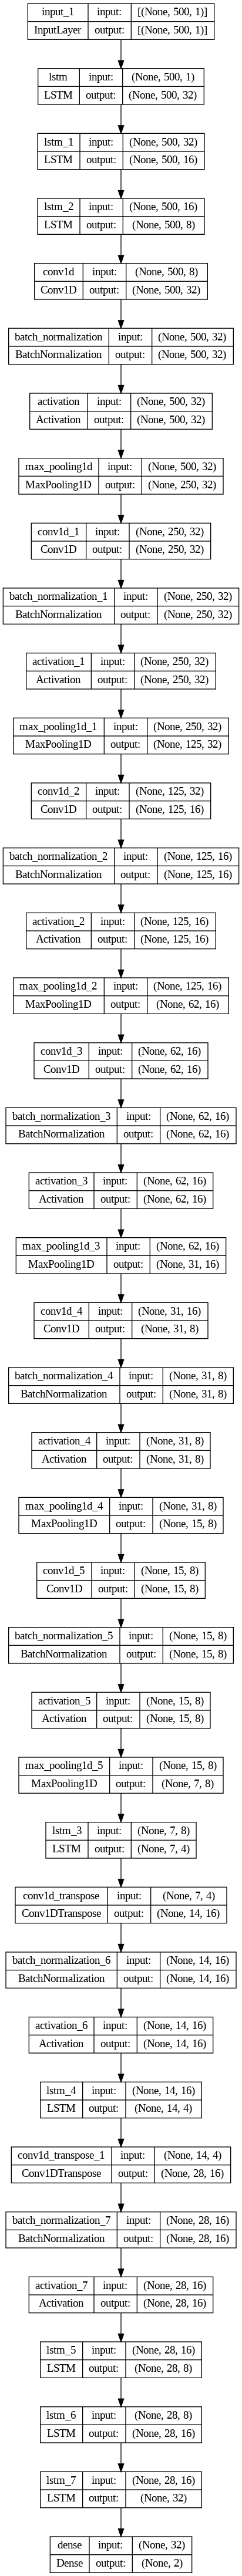

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, to_file='model_1.png', show_shapes=True, show_layer_names=True)


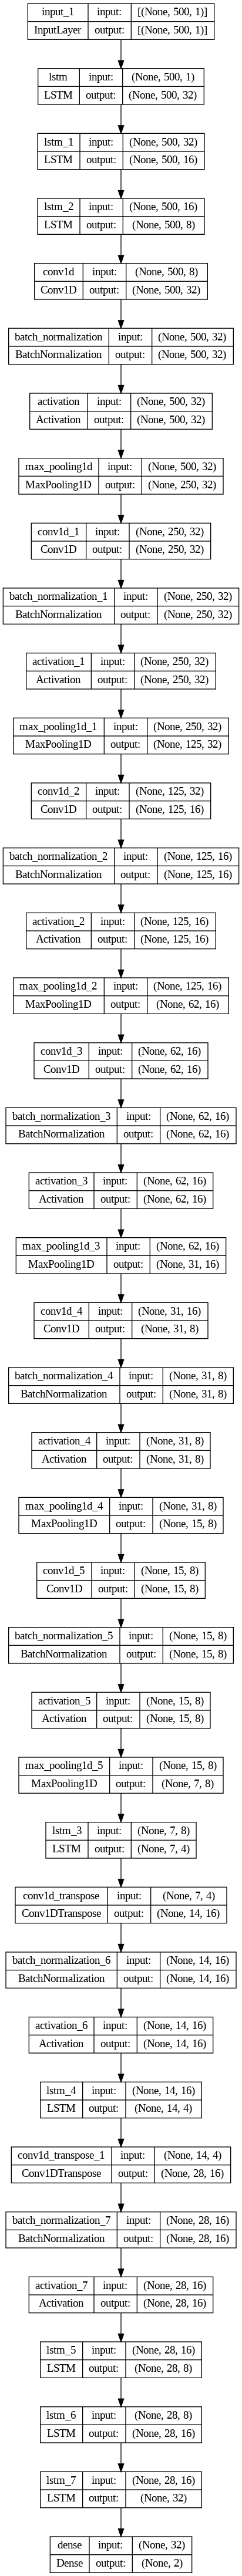

In [ ]:
from tensorflow.keras.utils import model_to_dot
from IPython.display import Image

model_plot = model_to_dot(model_1, show_shapes=True, show_layer_names=True)

# Hiển thị biểu đồ
Image(model_plot.create_png())

In [ ]:
optimizer = Adam(learning_rate=0.001)
model_1.compile(loss='mean_squared_error', optimizer=optimizer)

callbacks = get_callbacks(20)

history = model_1.fit(X_train_norm, y_train,
                      validation_split = 0.3,
                      epochs=300, batch_size= 128,
                      callbacks=[callbacks])

Epoch 1/300
106/106 [==============================] - ETA: 0s - loss: 1.1393
Epoch 1: val_loss improved from inf to 5.92960, saving model to best_model_weights.h5
106/106 [==============================] - 34s 150ms/step - loss: 1.1393 - val_loss: 5.9296 - lr: 0.0010
Epoch 2/300
106/106 [==============================] - ETA: 0s - loss: 0.8611
Epoch 2: val_loss improved from 5.92960 to 5.64228, saving model to best_model_weights.h5
106/106 [==============================] - 11s 102ms/step - loss: 0.8611 - val_loss: 5.6423 - lr: 0.0010
Epoch 3/300
106/106 [==============================] - ETA: 0s - loss: 0.7632
Epoch 3: val_loss improved from 5.64228 to 3.21166, saving model to best_model_weights.h5
106/106 [==============================] - 11s 106ms/step - loss: 0.7632 - val_loss: 3.2117 - lr: 0.0010
Epoch 4/300
106/106 [==============================] - ETA: 0s - loss: 0.7238
Epoch 4: val_loss improved from 3.21166 to 1.85346, saving model to best_model_weights.h5
106/106 [========

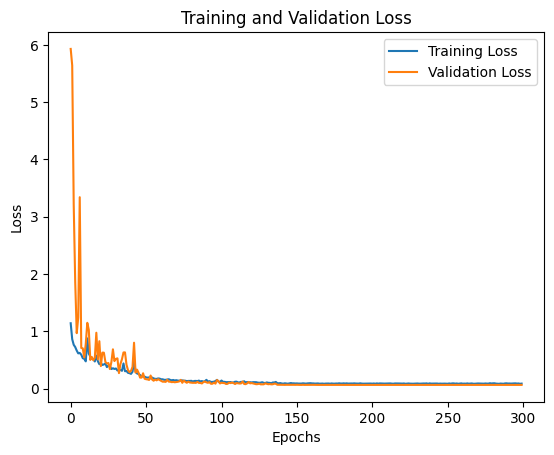

In [ ]:
plt.figure()
plt.plot(model_1.history.history["loss"], label="Training Loss")
plt.plot(model_1.history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
model_1.save('thickness_prediction_model.h5')

In [ ]:
model_1.load_weights("best_model_weights.h5")

y_test_result = model_1.predict(X_test_norm)

258/258 [==============================] - 14s 39ms/step


In [ ]:
y_test = np.squeeze(y_test, axis=-1)
lof_test = y_test[:, 0:1]
thickness_test = y_test[:, 1:2]

lof_test_result = y_test_result[:, 0:1]
thickness_test_result = y_test_result[:, 1:2]

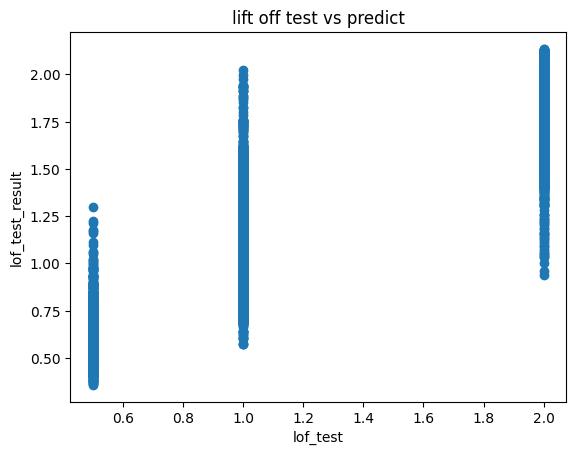

In [ ]:
  plt.scatter(lof_test, lof_test_result)
  plt.xlabel("lof_test")
  plt.ylabel("lof_test_result")
  plt.title("lift off test vs predict")
  plt.show()

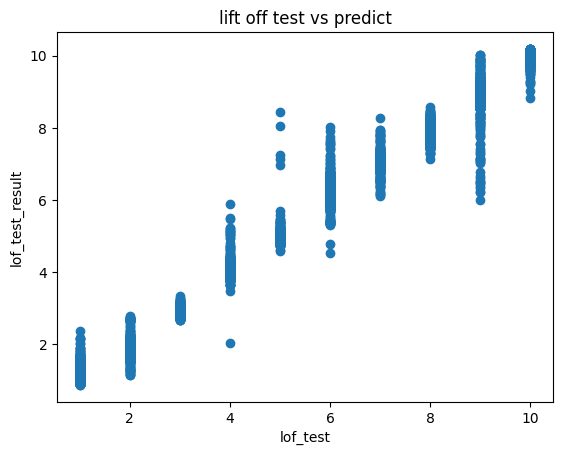

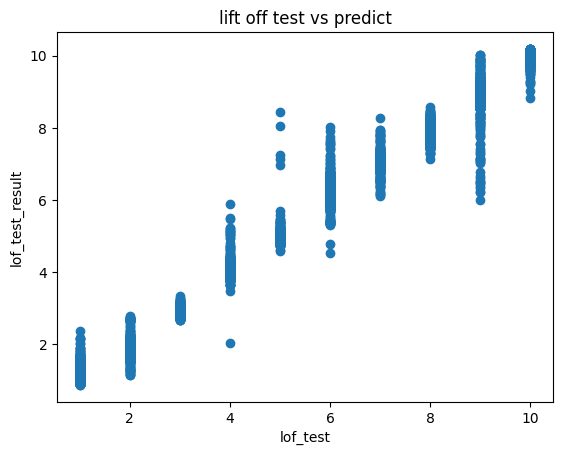

In [ ]:
plt.scatter(thickness_test, thickness_test_result)
plt.xlabel("lof_test")
plt.ylabel("lof_test_result")
plt.title("lift off test vs predict")
plt.show()